In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import time

# Part 1

In [2]:
def product(xs):
    result = 1
    for x in xs:
        result *= x
    return result

def polynomial(xs, y=1.5):
    result, y_i = 0, 1
    for i, x in enumerate(xs):
        result += x * y_i
        y_i *= y
    return result

def horner_polynomial(xs, y=1.5):
    result = xs[-1]
    for i in reversed(range(len(xs) - 1)):
        result = xs[i] + y * result
    return result

def bubble_sort(xs):
    n = len(xs) 
    for i in range(n): 
        for j in range(0, n - i - 1): 
            if xs[j] > xs[j + 1] : 
                xs[j], xs[j + 1] = xs[j + 1], xs[j] 
                
def quicksort(xs):
    return np.sort(xs, kind="quicksort")
    
def timsort(xs):
    xs.sort()

In [3]:
def timing(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

def simulate(func, start=1, end=2000, step=1):
    result = []
    for n in range(start, end + 1, step):
        mean_running_time = np.mean([timing(func, np.random.uniform(size=n)) for _ in range(5)])
        result.append(mean_running_time)
    return result

In [4]:
def plot_result(xs, simulated_data, theoretical_data):
    plt.figure(figsize=(16, 9))
    plt.xlabel("Input dimention", fontsize=16)
    plt.ylabel("Time (seconds)", fontsize=16)
    plt.grid()
    plt.plot(xs, simulated_data)
    plt.plot(xs, theoretical_data, linewidth=4, linestyle="--", color="red")
    plt.legend(["Experimental results", "Approximation based on theoretical estimates"], fontsize=14)

In [9]:
def const(x, a):
    return a

def linear(x, a, b):
    return a * x + b

def nlogn(x, a, b):
    return a * x * np.log(x) + b

def quadratic(x, a, b):
    return a * x ** 2 + b

def cubic(x, a, b):
    return a * x ** 3 + b

xs = list(range(1, 2001))

### Const function

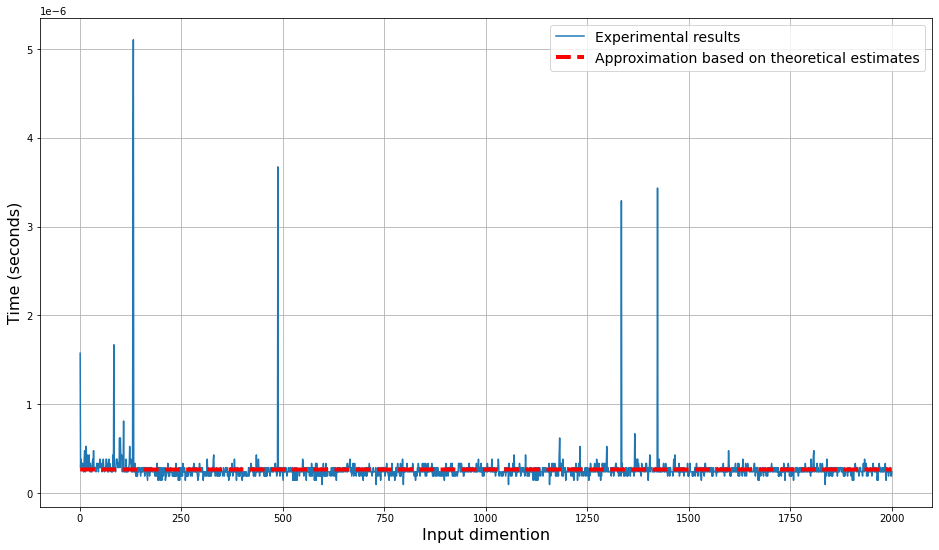

In [11]:
simulated_data = simulate(const)
popt, _ = curve_fit(const, xs, simulated_data)
theoretical_data = [const(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Sum

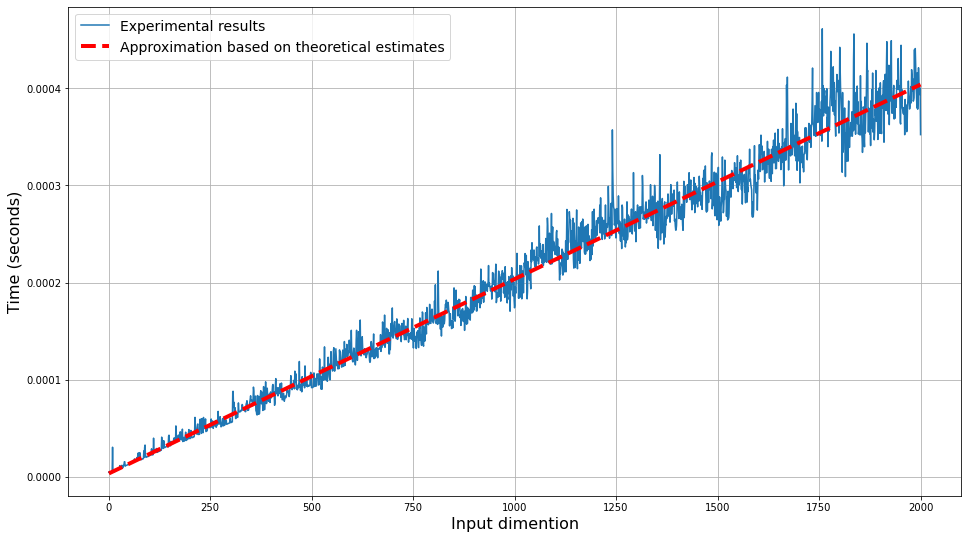

In [20]:
simulated_data = simulate(sum)
popt, _ = curve_fit(linear, xs, simulated_data)
theoretical_data = [linear(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Product

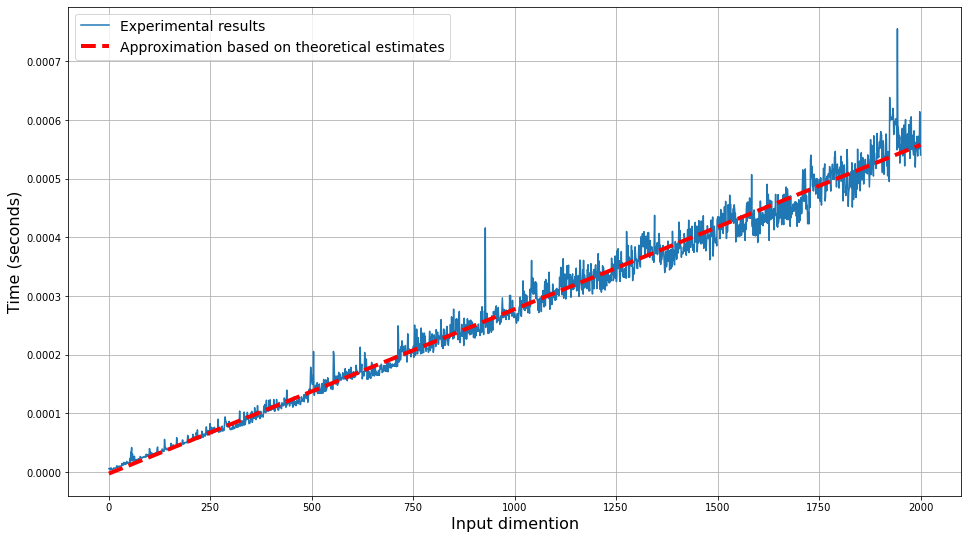

In [25]:
simulated_data = simulate(product)
popt, _ = curve_fit(linear, xs, simulated_data)
theoretical_data = [linear(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Polynomial

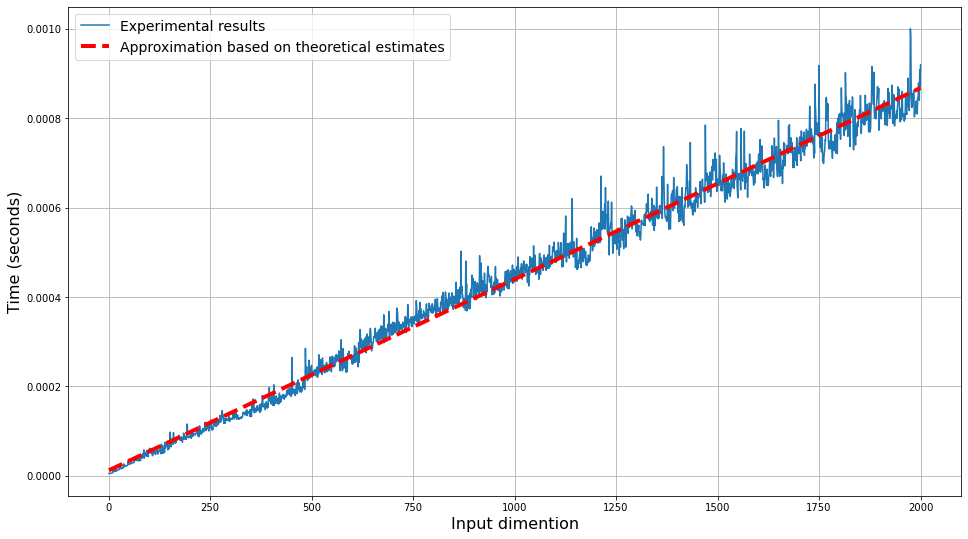

In [26]:
simulated_data = simulate(polynomial)
popt, _ = curve_fit(linear, xs, simulated_data)
theoretical_data = [linear(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Horner's polynomial

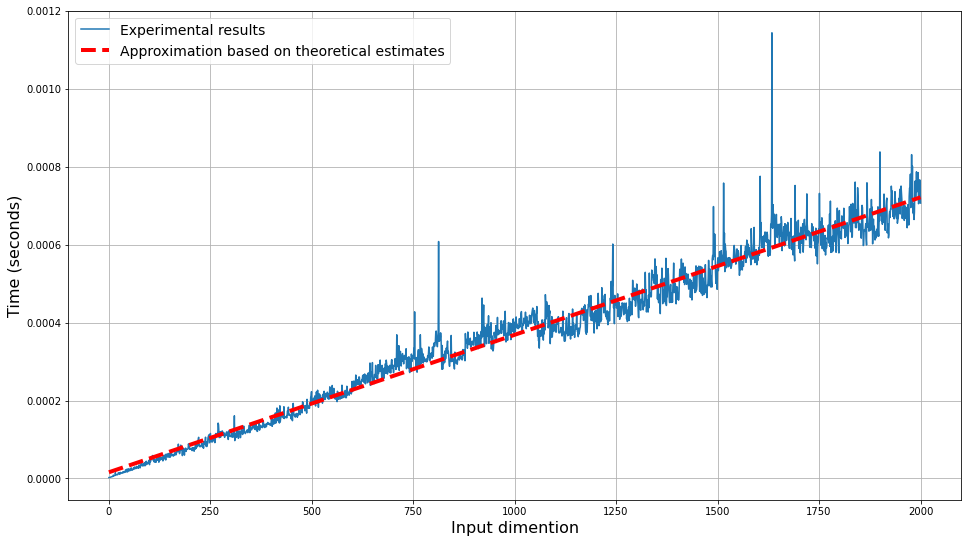

In [27]:
simulated_data = simulate(horner_polynomial)
popt, _ = curve_fit(linear, xs, simulated_data)
theoretical_data = [linear(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Quicksort

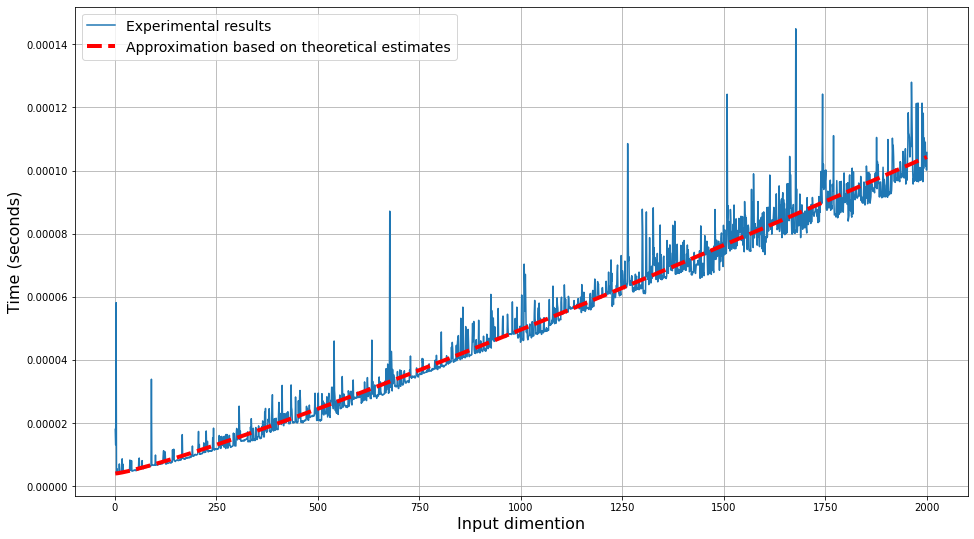

In [35]:
simulated_data = simulate(quicksort)
popt, _ = curve_fit(nlogn, xs, simulated_data)
theoretical_data = [nlogn(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Timsort

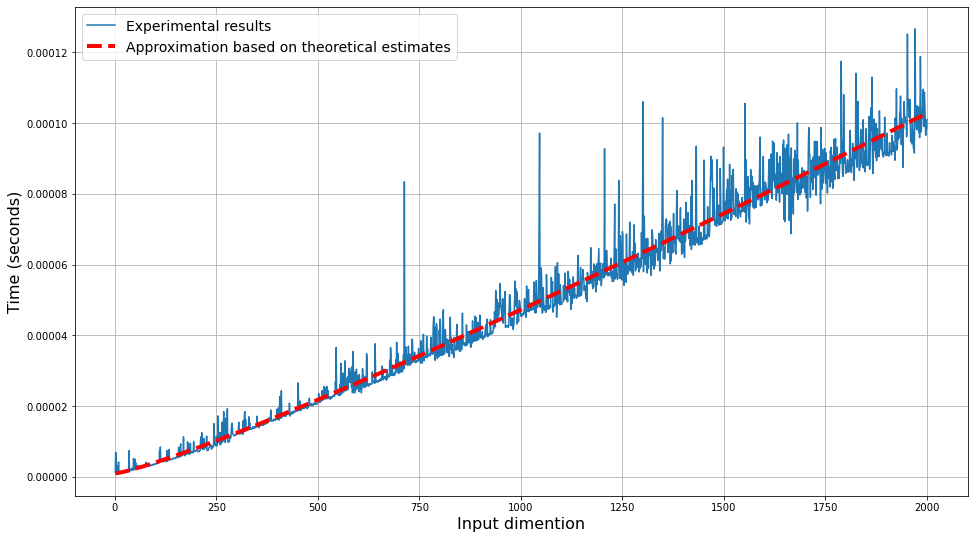

In [40]:
simulated_data = simulate(timsort)
popt, _ = curve_fit(nlogn, xs, simulated_data)
theoretical_data = [nlogn(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

### Bubble sort

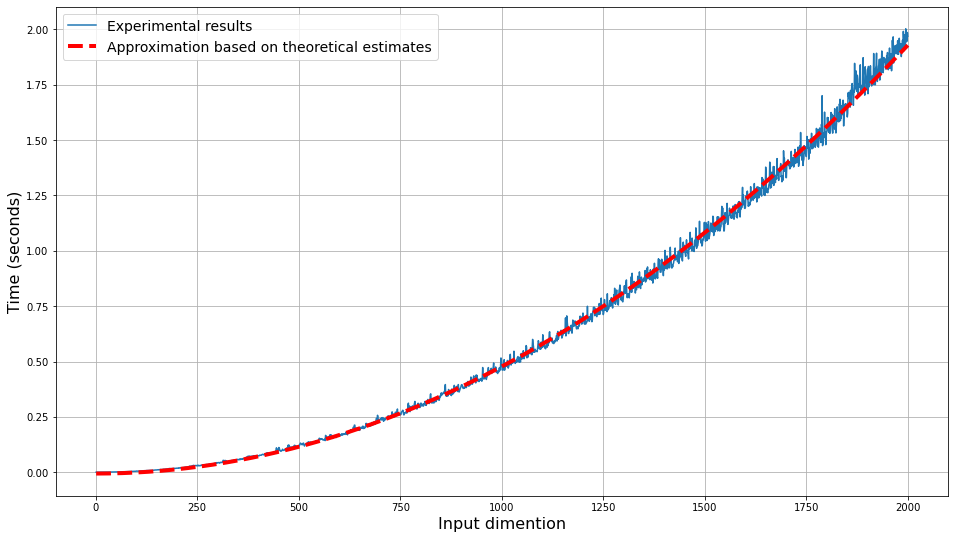

In [41]:
simulated_data = simulate(bubble_sort)
popt, _ = curve_fit(quadratic, xs, simulated_data)
theoretical_data = [quadratic(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)

# Part 2

In [42]:
def matmul(A, B):
    return np.matmul(A, B)

def simulate(func, start=1, end=2000, step=1):
    result = []
    for n in trange(start, end + 1, step):
        A = np.random.uniform(size=(n, n))
        B = np.random.uniform(size=(n, n))
        mean_running_time = np.mean([timing(func, A, B) for _ in range(5)])
        result.append(mean_running_time)
    return result

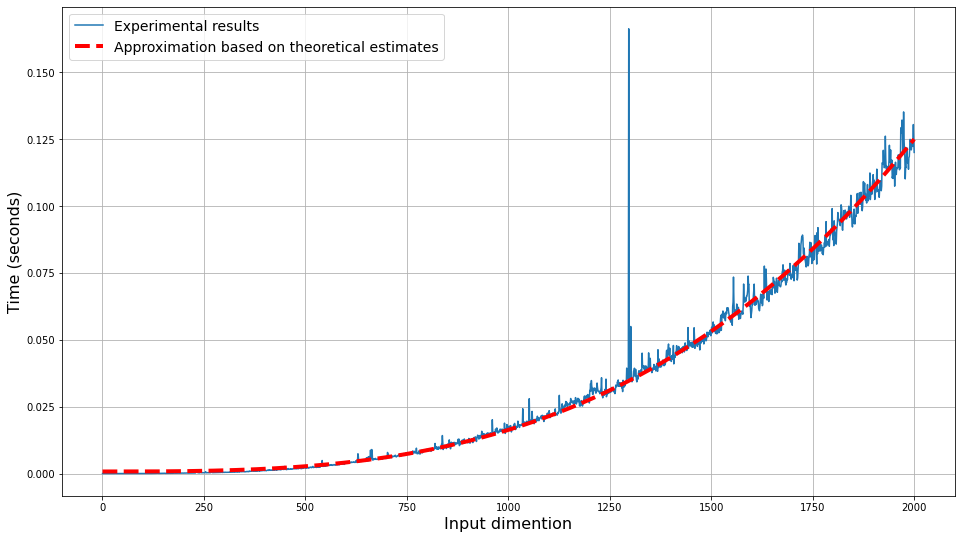

In [43]:
simulated_data = simulate(matmul)
popt, _ = curve_fit(cubic, xs, simulated_data)
theoretical_data = [cubic(x, *popt) for x in xs]
plot_result(xs, simulated_data, theoretical_data)